In [3]:
pip install gseapy

  Obtaining dependency information for gseapy from https://files.pythonhosted.org/packages/42/ee/b43d664c76d245d7b4df365a30dc434e4042c22cbd79f3887efdf57f4818/gseapy-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 18.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gseapy
import pandas as pd
from gseapy import barplot, dotplot
import numpy as np

In [4]:


# Read CSV file
master = pd.read_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/master_combined_DEG_list_all_celltypes_forfigs.csv")



In [5]:
master.head()

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
0,1,1.455338,-1.588874,0.391162,-4.061933,0.000049,0.368856,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
1,2,0.398462,0.416539,0.569923,0.730868,0.464860,0.996897,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
2,3,1.655950,0.252168,0.364172,0.692442,0.488660,0.996897,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
3,4,1.286656,-0.970785,0.511936,-1.896301,0.057920,0.996897,cohort.cohortGuid,BR1,ISG15,ASDC,Female
4,5,2.715461,-0.050106,0.293679,-0.170615,0.864527,0.996897,cohort.cohortGuid,BR1,SDF4,ASDC,Female


# IL1B+ CD14 mono (Female BR2) pathway analysis

In [6]:
# Filter data
master_1 = master[(master['celltype'] == 'IL1B+ CD14 monocyte') & 
                  (master['padj'] <= 0.4) & 
                  (master['sex'] == 'Female')
                  #( master['Direction'] == 'BR1')
                 ]

# Extract gene list
gl = master_1['gene']
print(gl)

192902       PTGS2
192903      BCL2A1
192904       NLRP3
192905        OAZ1
192906        G0S2
192907       CMTM6
192908    RASGEF1B
192909       RIPK2
192910       RABL6
192911        SGK1
192912     SELENOK
192913      METRNL
192914        MIDN
192915     DNAJC10
192916        BCL6
192917       PCBP2
192918        IL1B
192919       NR4A1
192920       FKBP5
192921       SOCS3
192922        EREG
192923         TNF
192924       SHTN1
192925        WARS
192926        BAG1
192927      CDKN2D
192928      ATP1B3
192929       RPLP2
192930      ATP5PD
Name: gene, dtype: object


In [10]:
# Filter data
master_1 = master[(master['celltype'] == 'IL1B+ CD14 monocyte') & 
                  (master['padj'] <= 0.4) & 
                  (master['sex'] == 'Female')
                  #( master['Direction'] == 'BR1')
                 ]

# Extract gene list
gl = master_1['gene']

# Convert the list to a string with quotes around each gene, separated by commas
gene_list_str = ', '.join(f'"{gene}"' for gene in gl)

print(gene_list_str)
len(gl)

"PTGS2", "BCL2A1", "NLRP3", "OAZ1", "G0S2", "CMTM6", "RASGEF1B", "RIPK2", "RABL6", "SGK1", "SELENOK", "METRNL", "MIDN", "DNAJC10", "BCL6", "PCBP2", "IL1B", "NR4A1", "FKBP5", "SOCS3", "EREG", "TNF", "SHTN1", "WARS", "BAG1", "CDKN2D", "ATP1B3", "RPLP2", "ATP5PD"


29

In [23]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Pathway_Analysis/IL1B_CD14 monocyte_DEGS_Female_UpinBR2_padj0.1.csv", index=False)


In [24]:
# assign a list object to enrichr
#gl = ["BCL6", "IL1B", "NLRP3", "METRNL", "PTGS2", "TNF", "TNFRSF1B"]


enrich_reseult = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023')


In [25]:
#enrich_reseult.res2d.head()
enrich_reseult.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Interleukin-1 Beta Prod...,2/57,0.000432,0.023494,0,0,80.541414,624.012495,RIPK2;NLRP3
1,GO_Biological_Process_2023,Positive Regulation Of Interleukin-1 Productio...,2/64,0.000544,0.023494,0,0,71.422939,536.829530,RIPK2;NLRP3
2,GO_Biological_Process_2023,Positive Regulation Of Cysteine-Type Endopepti...,2/64,0.000544,0.023494,0,0,71.422939,536.829530,RIPK2;NLRP3
3,GO_Biological_Process_2023,Extrinsic Apoptotic Signaling Pathway (GO:0097...,2/67,0.000596,0.023494,0,0,68.116239,505.747827,BCL2A1;G0S2
4,GO_Biological_Process_2023,Positive Regulation Of Cytokine Production (GO...,3/320,0.000609,0.023494,0,0,23.271293,172.306635,RIPK2;NLRP3;PTGS2
5,GO_Biological_Process_2023,Regulation Of Interleukin-1 Beta Production (G...,2/84,0.000935,0.030088,0,0,53.948509,376.267345,RIPK2;NLRP3
6,GO_Biological_Process_2023,Intrinsic Apoptotic Signaling Pathway (GO:0097...,2/105,0.001456,0.037096,0,0,42.903991,280.256124,BCL2A1;SELENOK
7,GO_Biological_Process_2023,Osmosensory Signaling Pathway (GO:0007231),1/5,0.002747,0.037096,0,0,499.625000,2946.374120,NLRP3
8,GO_Biological_Process_2023,Regulation Of Type 2 Immune Response (GO:0002828),1/5,0.002747,0.037096,0,0,499.625000,2946.374120,NLRP3
9,GO_Biological_Process_2023,Positive Regulation Of T-helper 2 Cell Differe...,1/5,0.002747,0.037096,0,0,499.625000,2946.374120,NLRP3


In [9]:
enrich_reseult.results.head(10)
enrich_reseult.results.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Pathway_Analysis/IL1B_CD14 monocyte_DEGS_Female_UpinBR2_padj0.1_enrichr_results.csv", index=False)

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


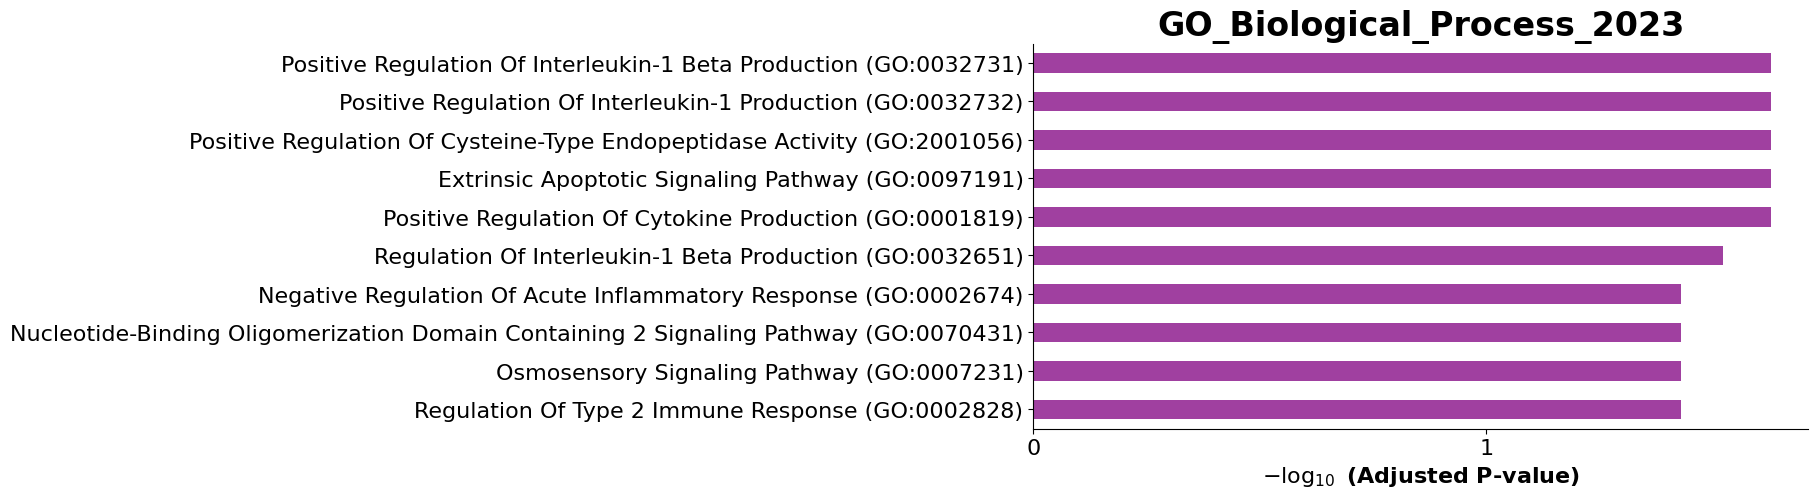

In [10]:
#BR2
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='purple', column= 'Adjusted P-value')

# Core CD14 mono (Female BR2) pathway analysis

In [26]:
# Filter data
master_1 = master[(master['celltype'] == 'Core CD14 monocyte') & 
                  (master['padj'] <= 0.1) & 
                  (master['sex'] == 'Female')&
                  ( master['Direction'] == 'BR2')]

# Extract gene list
gl = master_1['gene']
print(gl)

101348         SFXN3
101349           SKI
101351        SFT2D2
101352    AC012368.1
101353        SESTD1
101354        NBEAL2
101355         RAP2B
101357         ORAI2
101358       DENND5A
101359         SORL1
101361         BAZ2A
101363     LINC02001
101364        CD300E
101365      C18orf25
101367         MEF2D
101368        GPR155
101374          TNK2
101376         HSH2D
101377        CHST11
101378        ZBTB18
101379        SLC6A6
101382         LIN7A
101383       SLC12A6
101384        PECAM1
101385       SLC16A6
101391        ZSWIM8
101392        FAM53B
101393        MHENCR
101394           CIC
101395         UVSSA
101396       FAM214B
101397        NHLRC3
101398         NDRG1
101399       RPS6KA5
101400          DEF8
101401      TP53INP1
101404         FURIN
101405        GRAMD4
101406      IVNS1ABP
101407         MED15
101408          KSR1
101409         CSF3R
101411       ZNF385A
Name: gene, dtype: object


In [27]:
# Save the DataFrame to a CSV file
gl.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Pathway_Analysis/Core_CD14 monocyte_DEGS_Female_UpinBR2_padj0.1.csv", index=False)


In [28]:
# assign a list object to enrichr
#gl = ["BCL6", "IL1B", "NLRP3", "METRNL", "PTGS2", "TNF", "TNFRSF1B"]


enrich_reseult = gseapy.enrichr(gene_list=gl, gene_sets='GO_Biological_Process_2023')


In [29]:
enrich_reseult.results.head(10)
enrich_reseult.results.to_csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Pathway_Analysis/Core_CD14 monocyte_DEGS_Female_UpinBR2_padj0.1_enrichr_results.csv", index=False)

In [30]:
# Assuming 'enrich_result.results' is your DataFrame containing the adjusted p-values
enrich_reseult.results['-log10_adj_pvalue'] = -np.log10(enrich_reseult.results['Adjusted P-value'])
enrich_reseult.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-log10_adj_pvalue
0,GO_Biological_Process_2023,Negative Regulation Of BMP Signaling Pathway (...,3/43,0.000108,0.044326,0,0,37.344375,341.223477,SKI;GPR155;SORL1,1.353344
1,GO_Biological_Process_2023,Negative Regulation Of Cellular Response To Gr...,3/71,0.000478,0.077066,0,0,21.936397,167.731396,SKI;SORL1;GPR155,1.113139
2,GO_Biological_Process_2023,Regulation Of BMP Signaling Pathway (GO:0030510),3/75,0.000561,0.077066,0,0,20.713542,155.051370,SKI;SORL1;GPR155,1.113139
3,GO_Biological_Process_2023,Regulation Of Peptidyl-Tyrosine Phosphorylatio...,3/90,0.000955,0.098331,0,0,17.129310,119.119679,RAP2B;TNK2;PECAM1,1.007309
4,GO_Biological_Process_2023,Establishment Of Endothelial Barrier (GO:0061028),2/28,0.001647,0.119955,0,0,37.393996,239.646266,RAP2B;PECAM1,0.920981
5,GO_Biological_Process_2023,Negative Regulation Of Transmembrane Receptor ...,3/111,0.001747,0.119955,0,0,13.784028,87.527208,SKI;SORL1;GPR155,0.920981
6,GO_Biological_Process_2023,Amino Acid Transmembrane Transport (GO:0003333),2/42,0.003681,0.126348,0,0,24.289024,136.128872,SLC6A6;SFXN3,0.898432
7,GO_Biological_Process_2023,Skeletal Muscle Tissue Development (GO:0007519),2/42,0.003681,0.126348,0,0,24.289024,136.128872,ZBTB18;SKI,0.898432
8,GO_Biological_Process_2023,Positive Regulation Of Cellular Catabolic Proc...,3/146,0.003798,0.126348,0,0,10.391958,57.916795,TP53INP1;ZSWIM8;FURIN,0.898432
9,GO_Biological_Process_2023,Carboxylic Acid Transport (GO:0046942),2/53,0.005804,0.126348,0,0,19.039694,98.039190,SLC6A6;SLC16A6,0.898432


/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


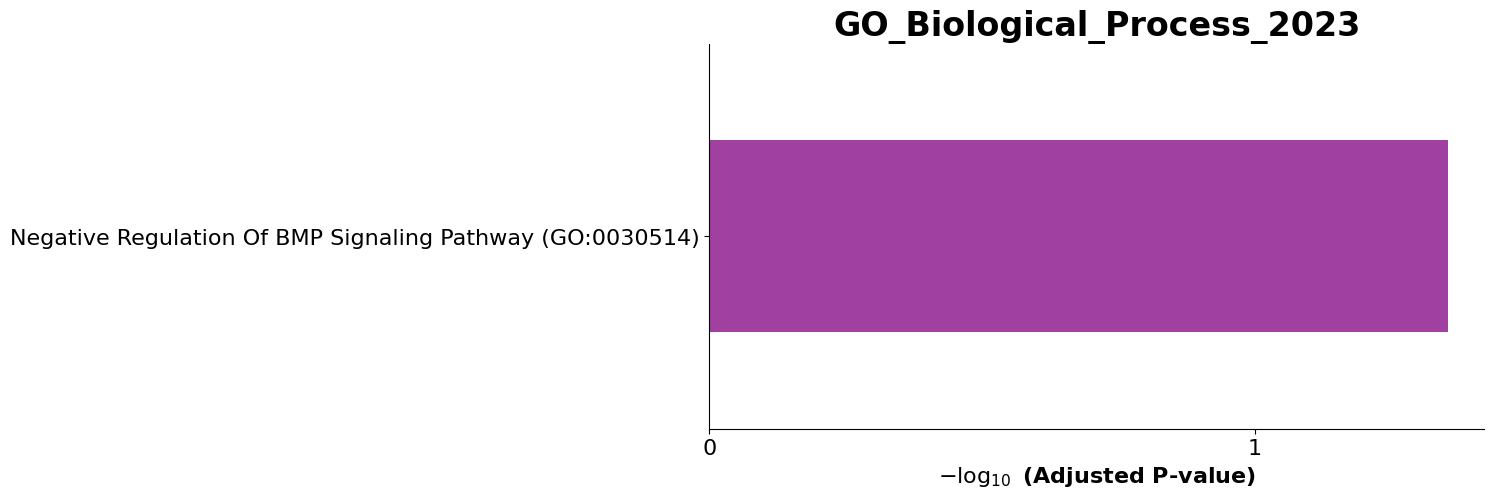

In [31]:
#BR2
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='purple', column= 'Adjusted P-value', top_term=50)

/opt/conda/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


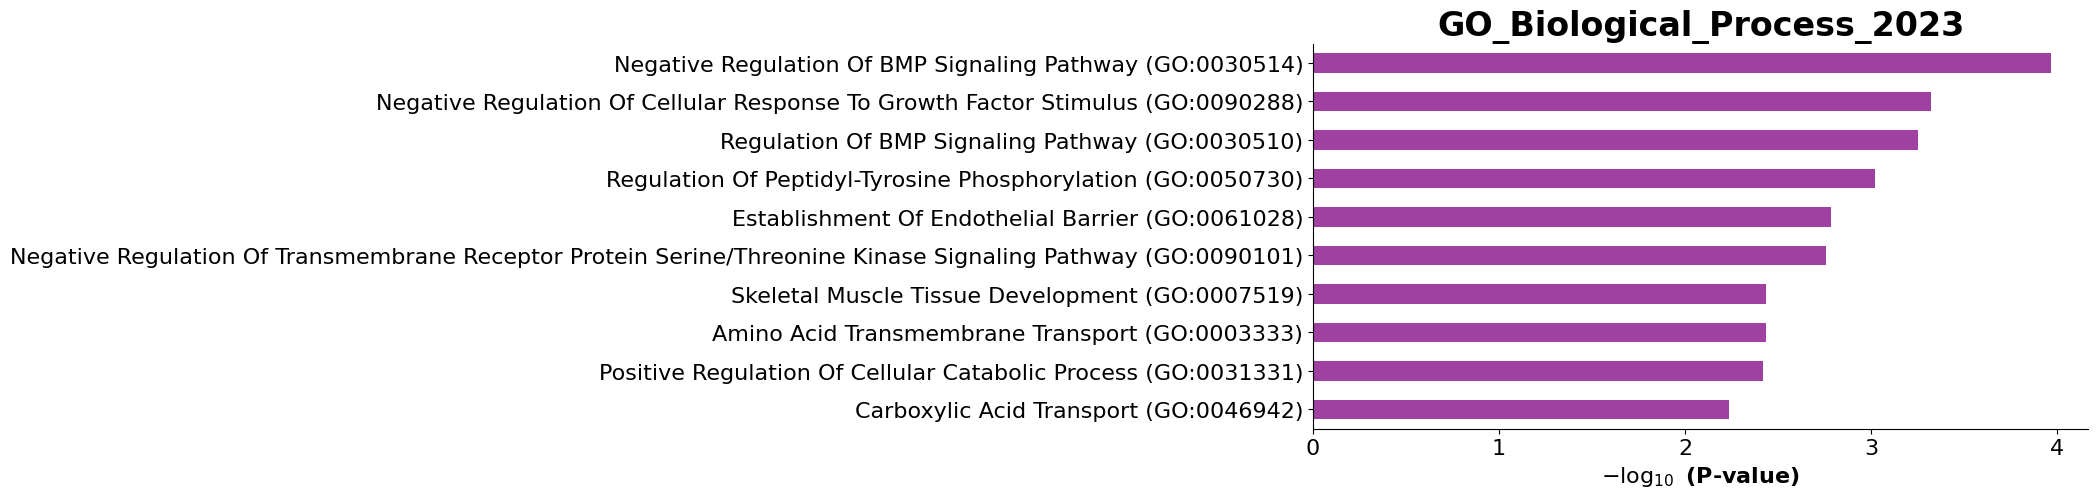

In [32]:
#BR2
ax = barplot(enrich_reseult.res2d,title='GO_Biological_Process_2023', figsize=(10, 5), color='purple', column= 'P-value')